<h1 style="color: #FECB05; text-align: center;">Ejercicios prácticos de clústering y reducción de dimensión</h1>

<h2 id="section1" style="color: #007ACC;">Segmentación de Clientes con Análisis RFM</h2>

En el mundo de los negocios, una de las verdades más grandes es que no todos los clientes aportan el mismo valor. Algunos compran una vez y nunca regresan, mientras que otros se convierten en verdaderos embajadores de nuestra marca, comprando con frecuencia y recomendándonos a sus amigos. A pesar de esto, muchas empresas caen en la trampa del marketing masivo, enviando el mismo correo electrónico, la misma promoción y el mismo mensaje a toda su base de clientes por igual.

Este enfoque de "talla única" no solo es ineficiente, sino que también puede ser contraproducente. Imagina ofrecer un gran descuento de "primera compra" a tu cliente más leal, o gastar una fortuna en publicidad para intentar recuperar a alguien que no ha comprado en cinco años. Es un desperdicio de recursos y una oportunidad perdida para construir relaciones más fuertes.

Aquí es donde entra en juego la **segmentación**: el arte de dividir a los clientes en grupos con características o comportamientos similares para poder comunicarnos con ellos de una manera más relevante y personalizada. ¿Pero cómo sabemos qué clientes agrupar? ¿Qué características son las más importantes?

<h3 id="section1" style="color: #007ACC;">Presentando el Análisis RFM</h3>

Para responder a estas preguntas, no necesitamos complejos modelos de inteligencia artificial para empezar. Una de las técnicas más poderosas, probadas y sorprendentemente simples es el **Análisis RFM**.

RFM es un método de segmentación basado en el comportamiento del cliente. El acrónimo representa las tres dimensiones clave que analiza, basadas en el historial de transacciones de cada persona:

* **Recencia (Recency):** ¿Qué tan **recientemente** compró este cliente?
* **Frecuencia (Frequency):** ¿Qué tan **frecuentemente** nos compra?
* **Valor Monetario (Monetary):** ¿Cuánto **dinero** ha gastado con nosotros?

La idea central detrás del RFM es intuitiva y potente: los clientes que te han comprado **hace poco tiempo**, que compran **a menudo** y que **gastan más dinero**, son tus clientes más valiosos. Son los que tienen la mayor probabilidad de responder a tus ofertas y de permanecer leales a tu marca.

En esta clase, aprenderemos a calcular y utilizar estas tres métricas para clasificar a nuestra base de clientes, identificar a nuestros "campeones", encontrar a los que están en riesgo y, en última- instancia, tomar decisiones de marketing más inteligentes y rentables.


El análisis RFM se construye sobre tres dimensiones del comportamiento del cliente. Para formalizar su cálculo, definamos primero nuestras variables:

Sea $C$ el conjunto de todos los clientes. Para un cliente específico $c \in C$, sea $T_c$ el conjunto de todas sus transacciones pasadas: $T_c = \{t_1, t_2, \dots, t_n\}$.

Cada transacción $t_i$ tiene dos atributos principales:
* $Date(t_i)$: La fecha en que ocurrió la transacción.
* $Value(t_i)$: El valor monetario de la transacción.

Finalmente, definimos $D_{snapshot}$ como la fecha en la que se realiza el análisis, que sirve como punto de referencia.

<h4 id="section1" style="color: #007ACC;"> Recencia (Recency - R) </h4>

* **Pregunta Clave:** ¿Cuándo fue la última vez que el cliente realizó una compra?
* **Cálculo Matemático:** La recencia para un cliente $c$, denotada como $R_c$, se calcula como la diferencia entre la fecha del análisis y la fecha de la transacción más reciente del cliente.

    $$R_c = D_{snapshot} - \max_{t_i \in T_c}(Date(t_i))$$

* **Importancia Estratégica:** $R_c$ es el indicador más fuerte del compromiso actual. Un valor bajo de $R_c$ (medido en días) significa que el cliente ha interactuado recientemente y es más propenso a responder a nuevas campañas.

<h4 id="section1" style="color: #007ACC;"> Frecuencia (Frequency - F) </h4>

* **Pregunta Clave:** ¿Con qué frecuencia nos compra este cliente?
* **Cálculo Matemático:** La frecuencia para un cliente $c$, denotada como $F_c$, es simplemente la cardinalidad del conjunto de sus transacciones.

    $$F_c = |T_c|$$

* **Importancia Estratégica:** $F_c$ es un indicador directo de la **lealtad** del cliente. Un valor alto de $F_c$ indica un cliente recurrente y satisfecho, que es un activo valioso para la empresa.

<h4 id="section1" style="color: #007ACC;"> Valor Monetario (Monetary - M) </h4>

* **Pregunta Clave:** ¿Cuánto dinero ha gastado el cliente en total?
* **Cálculo Matemático:** El valor monetario para un cliente $c$, denotado como $M_c$, es la suma de los valores de todas sus transacciones.

    $$M_c = \sum_{t_i \in T_c} Value(t_i)$$

* **Importancia Estratégica:** $M_c$ cuantifica el valor económico directo que un cliente ha aportado. Ayuda a identificar a los clientes de alto poder adquisitivo y a priorizar los esfuerzos de marketing en aquellos que generan mayores ingresos.

<h3 id="section1" style="color: #007ACC;">Cálculo de los Scores RFM: El Proceso Paso a Paso</h3>

<h4 id="section1" style="color: #007ACC;"> Valor Monetario (Monetary - M) </h4>


Todo análisis RFM comienza con un historial de transacciones. Como mínimo, necesitamos una tabla que contenga tres columnas clave:

* **`CustomerID`:** Un identificador único para cada cliente.
* **`TransactionDate`:** La fecha en que se realizó cada compra.
* **`Amount`:** El monto o valor de cada compra.

Un ejemplo de los datos de entrada podría verse así:

| CustomerID | TransactionDate | Amount |
| :--- | :--- | :--- |
| 12345 | 2025-08-15 | 50.00 |
| 67890 | 2025-08-15 | 120.50 |
| 12345 | 2025-08-22 | 75.25 |
| 54321 | 2025-07-10 | 250.00 |


<h4 id="section1" style="color: #007ACC;"> Creación de la Tabla RFM </h4>

El objetivo es transformar la lista de transacciones en una tabla donde cada fila represente a un único cliente, con sus valores RFM agregados. Esto implica:

1.  **Calcular la Recencia (R):** Para cada cliente, encuentra la fecha de su última compra y resta esa fecha de la fecha de análisis (por ejemplo, hoy, 2 de septiembre de 2025). El resultado se mide en días.
2.  **Calcular la Frecuencia (F):** Para cada cliente, cuenta el número total de transacciones únicas que ha realizado.
3.  **Calcular el Valor Monetario (M):** Para cada cliente, suma el monto de todas sus transacciones.

El resultado será una tabla como esta:

| CustomerID | Recency (días) | Frequency | Monetary |
| :--- | :--- | :--- | :--- |
| 12345 | 11 | 2 | 125.25 |
| 67890 | 18 | 1 | 120.50 |
| 54321 | 54 | 1 | 250.00 |

<h4 id="section1" style="color: #007ACC;"> Asignación de Puntuaciones (Scoring) </h4>

El problema con la tabla anterior es que los valores de R, F y M están en escalas completamente diferentes (días, conteos, unidades monetarias). Para segmentar de manera efectiva, necesitamos estandarizarlos en una escala común.

La solución más común es usar **cuantiles** (generalmente quintiles, que dividen los datos en 5 grupos de igual tamaño) para asignar una puntuación del 1 al 5 a cada dimensión.

* **Puntuación de Recencia (R_Score):**
    Se divide a los clientes en 5 grupos según su valor de Recencia. A los clientes más recientes (con el menor número de días) se les da la puntuación más alta.
    * **5:** El 20% más reciente (mejor)
    * **4:** El siguiente 20%
    * **3:** El 20% intermedio
    * **2:** El siguiente 20%
    * **1:** El 20% menos reciente (peor)

* **Puntuación de Frecuencia (F_Score) y Monetaria (M_Score):**
    Se aplica la misma lógica, pero aquí un valor más alto es mejor.
    * **5:** El 20% que compra más frecuentemente / gasta más (mejor)
    * **4:** El siguiente 20%
    * **...**
    * **1:** El 20% que compra con menos frecuencia / gasta menos (peor)

Al final de este proceso, nuestra tabla RFM estará completa y lista para la segmentación:

| CustomerID | Recency | Frequency| Monetary | R_Score | F_Score | M_Score |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 12345 | 11 | 2 | 125.25 | 5 | 5 | 3 |
| 67890 | 18 | 1 | 120.50 | 4 | 2 | 2 |
| 54321 | 54 | 1 | 250.00 | 1 | 2 | 5 |

In [1]:
import pandas as pd
import datetime as dt
from ucimlrepo import fetch_ucirepo

In [2]:
online_retail = fetch_ucirepo(id=352)
df = pd.concat([online_retail.data.features, online_retail.data.ids], axis=1)
df.dropna(subset=['CustomerID'], inplace=True)
df['CustomerID'] = df['CustomerID'].astype(int)
df = df[df['Quantity'] > 0]

In [3]:
df.head()

Description  Quantity     InvoiceDate  UnitPrice  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6  12/1/2010 8:26       2.55   
1                  WHITE METAL LANTERN         6  12/1/2010 8:26       3.39   
2       CREAM CUPID HEARTS COAT HANGER         8  12/1/2010 8:26       2.75   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6  12/1/2010 8:26       3.39   
4       RED WOOLLY HOTTIE WHITE HEART.         6  12/1/2010 8:26       3.39   

   CustomerID         Country InvoiceNo StockCode  
0       17850  United Kingdom    536365    85123A  
1       17850  United Kingdom    536365     71053  
2       17850  United Kingdom    536365    84406B  
3       17850  United Kingdom    536365    84029G  
4       17850  United Kingdom    536365    84029E

In [4]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
print(f"Dimensiones del dataset limpio: {df.shape}")

Dimensiones del dataset limpio: (397924, 9)


In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

In [6]:
df

Description  Quantity         InvoiceDate  \
0        WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1                       WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2            CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3       KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4            RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   
...                                     ...       ...                 ...   
541904          PACK OF 20 SPACEBOY NAPKINS        12 2011-12-09 12:50:00   
541905         CHILDREN'S APRON DOLLY GIRL          6 2011-12-09 12:50:00   
541906        CHILDRENS CUTLERY DOLLY GIRL          4 2011-12-09 12:50:00   
541907      CHILDRENS CUTLERY CIRCUS PARADE         4 2011-12-09 12:50:00   
541908        BAKING SET 9 PIECE RETROSPOT          3 2011-12-09 12:50:00   

        UnitPrice  CustomerID         Country InvoiceNo StockCode  TotalPrice  
0            2.55       17850  United Kingdom    536365    85123A       15.30  
1            3.39       17850  United Kingdom    536365     71053       20.34  
2            2.75       17850  United Kingdom    536365    84406B       22.00  
3            3.39       17850  United Kingdom    536365    84029G       20.34  
4            3.39       17850  United Kingdom    536365    84029E       20.34  
...           ...         ...             ...       ...       ...         ...  
541904       0.85       12680          France    581587     22613       10.20  
541905       2.10       12680          France    581587     22899       12.60  
541906       4.15       12680          France    581587     23254       16.60  
541907       4.15       12680          France    581587     23255       16.60  
541908       4.95       12680          France    581587     22138       14.85  

[397924 rows x 9 columns]

In [7]:
# Agrupar por cliente y calcular los valores RFM
rfm_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days,
    'InvoiceNo': 'nunique', # Usamos nunique para contar facturas únicas como frecuencia
    'TotalPrice': 'sum'
})

# Renombrar las columnas
rfm_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

In [8]:
# Asignar R_Score (menor recencia = mayor puntuación)
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 5, labels=[5, 4, 3, 2, 1])

# Asignar F_Score (mayor frecuencia = mayor puntuación)
# Usamos rank(method='first') para manejar empates y asegurar una distribución equitativa
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Asignar M_Score (mayor valor monetario = mayor puntuación)
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combinar las puntuaciones en una sola columna
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)


In [9]:
rfm_data.head(10)

Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
CustomerID                                                                
12346           326          1  77183.60       1       1       5       115
12347             2          7   4310.00       5       5       5       555
12348            75          4   1797.24       2       4       4       244
12349            19          1   1757.55       4       1       4       414
12350           310          1    334.40       1       1       2       112
12352            36          8   2506.04       3       5       5       355
12353           204          1     89.00       1       1       1       111
12354           232          1   1079.40       1       1       4       114
12355           214          1    459.40       1       1       2       112
12356            23          3   2811.43       4       3       5       435

In [10]:
rfm_data[['Recency', 'Frequency', 'Monetary']].describe()

Recency    Frequency       Monetary
count  4339.000000  4339.000000    4339.000000
mean     92.518322     4.271952    2053.793018
std     100.009747     7.705493    8988.248381
min       1.000000     1.000000       0.000000
25%      18.000000     1.000000     307.245000
50%      51.000000     2.000000     674.450000
75%     142.000000     5.000000    1661.640000
max     374.000000   210.000000  280206.020000

/var/folders/7v/mlpbd2vj15s13pz4rjm4bq1m0000gn/T/ipykernel_5086/2093347905.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_data['Recency'])
/var/folders/7v/mlpbd2vj15s13pz4rjm4bq1m0000gn/T/ipykernel_5086/2093347905.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_data['Frequency'

<Axes: xlabel='Monetary', ylabel='Density'>

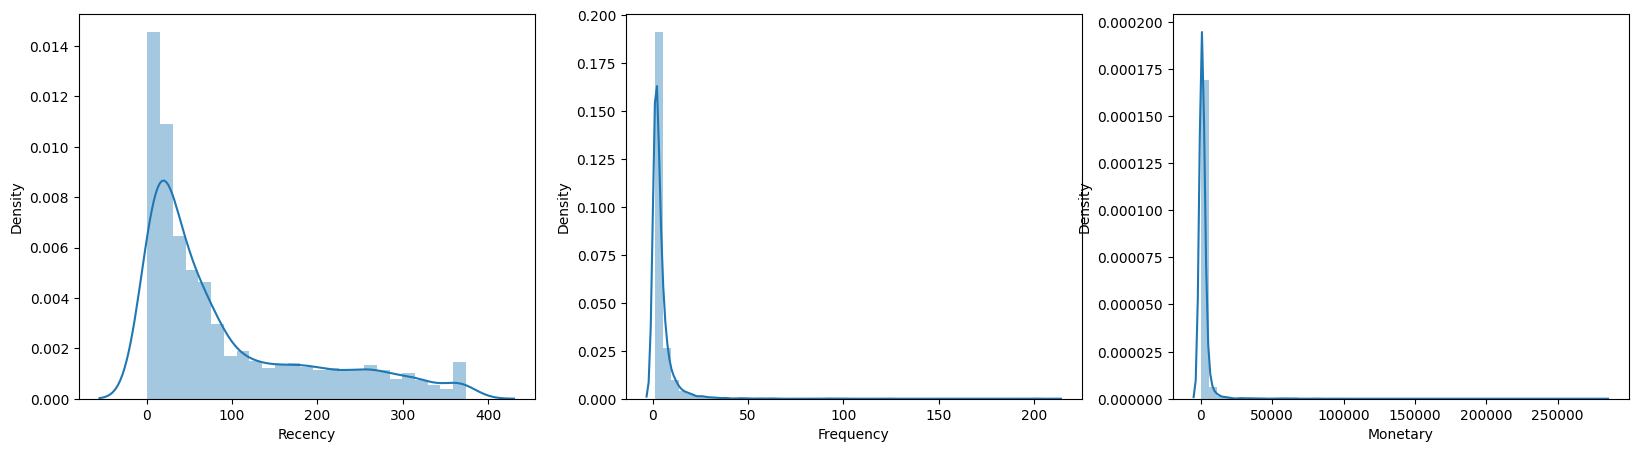

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(rfm_data['Recency'])

plt.subplot(1,3,2)
sns.distplot(rfm_data['Frequency'])

plt.subplot(1,3,3)
sns.distplot(rfm_data['Monetary'])

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import hdbscan
import warnings

warnings.filterwarnings('ignore')

In [13]:
# Seleccionar los datos para el clustering
rfm_for_clustering = rfm_data[['Recency', 'Frequency', 'Monetary']]

In [14]:
# Estandarizar los datos
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_for_clustering)

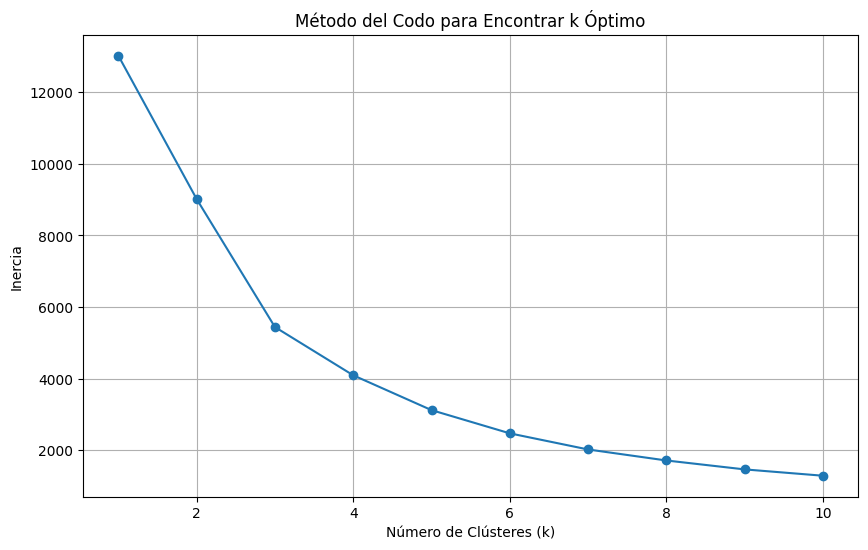

In [15]:
inertia = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(rfm_scaled)
    inertia[k] = kmeans.inertia_

plt.figure(figsize=(10, 6))
plt.plot(list(inertia.keys()), list(inertia.values()), 'o-')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Encontrar k Óptimo')
plt.grid(True)
plt.show()

In [16]:
# Aplicar K-Means con el k elegido
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(rfm_scaled)

# Añadir las etiquetas de clúster a nuestra tabla RFM original
rfm_data['Cluster'] = cluster_labels

# Analizar las características de cada clúster
# Calculamos la media de R, F y M para cada clúster
cluster_summary = rfm_data.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)

print("\n--- Resumen de los Segmentos Creados por K-Means ---")
print(cluster_summary)


--- Resumen de los Segmentos Creados por K-Means ---
         Recency  Frequency   Monetary
Cluster                               
0          15.67      22.05   12453.23
1         248.56       1.55     478.11
2           7.38      82.69  127338.31
3          43.91       3.66    1349.70


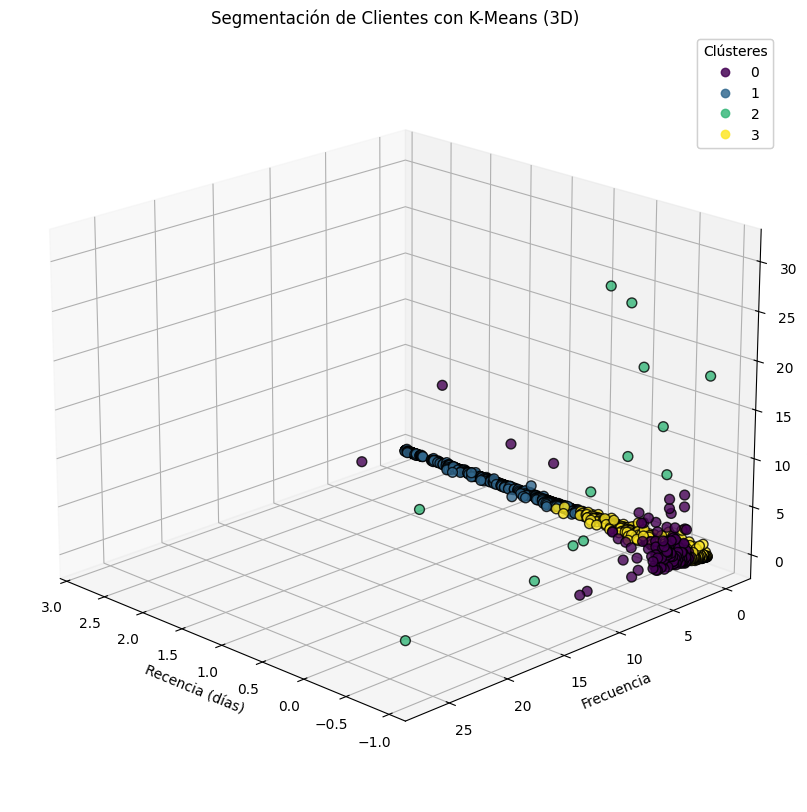

In [17]:
# Visualización 3D de los clústeres
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

rfm_scaled_df = pd.DataFrame(rfm_scaled)

scatter = ax.scatter(rfm_scaled_df[0], rfm_scaled_df[1], rfm_scaled_df[2],
                     c=rfm_data['Cluster'], cmap='viridis', s=50, edgecolors='k', alpha=0.8)

ax.set_title('Segmentación de Clientes con K-Means (3D)')
ax.set_xlabel('Recencia (días)')
ax.set_ylabel('Frecuencia')
ax.set_zlabel('Valor Monetario')

# Crear leyenda
legend1 = ax.legend(*scatter.legend_elements(), title="Clústeres")
ax.add_artist(legend1)

ax.view_init(elev=20, azim=135)
plt.show()

In [18]:
from sklearn.manifold import TSNE
import seaborn as sns

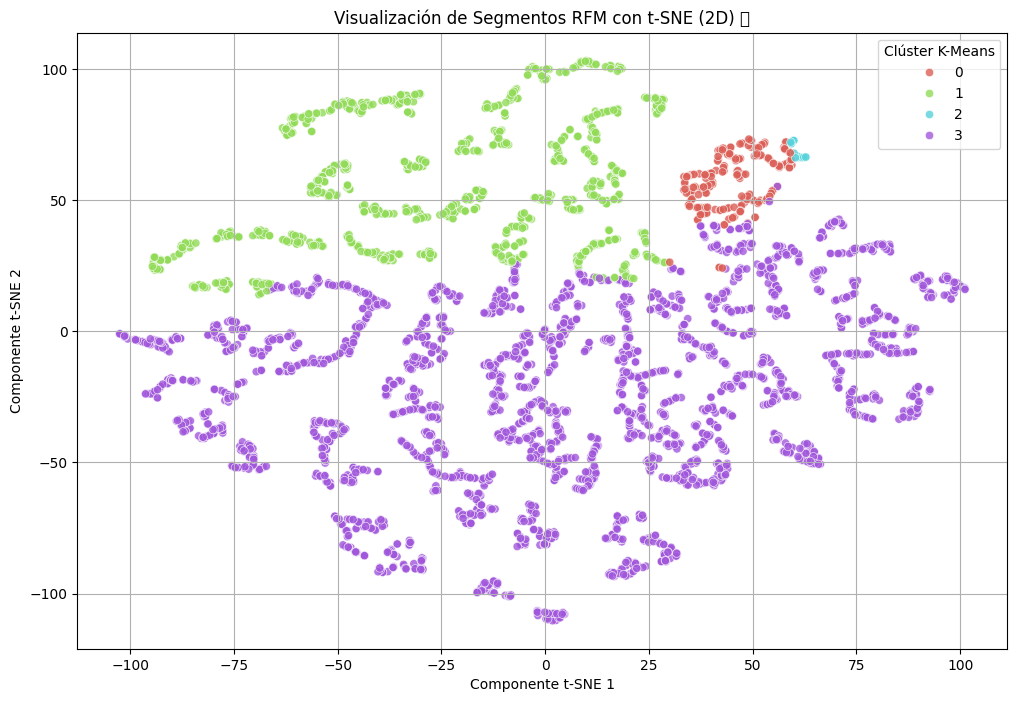

In [19]:
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
tsne_results = tsne.fit_transform(rfm_scaled)

rfm_data['tsne_1'] = tsne_results[:,0]
rfm_data['tsne_2'] = tsne_results[:,1]

plt.figure(figsize=(12, 8))

# Crear el gráfico de dispersión usando seaborn
sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="Cluster", # Colorear los puntos según el clúster de K-Means
    palette=sns.color_palette("hls", k), # 'k' es el número de clústeres
    data=rfm_data,
    legend="full",
    alpha=0.8
)

plt.title('Visualización de Segmentos RFM con t-SNE (2D) 🎨')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.legend(title='Clúster K-Means')
plt.grid(True)
plt.show()

<h3 id="section1" style="color: #007ACC;">Conclusiones y Estrategias Accionables Basadas en K-Means</h3>

El análisis de clustering con K-Means ha logrado agrupar nuestra base de clientes en segmentos distintos y coherentes, basándose en su comportamiento de compra. Esta segmentación automática nos permite ir más allá de las puntuaciones RFM individuales y entender los "arquetipos" o "personas" de clientes que existen en nuestro negocio.

Basándonos en los promedios de Recencia, Frecuencia y Valor Monetario de los **4 clústeres** encontrados, podemos asignarles un nombre y una estrategia de marketing personalizada.

**Segmento 1: Clientes Campeones (o VIP)**
* **Características:** Este grupo muestra una **Recencia muy baja** (compraron hace poco), una **Frecuencia muy alta** y el **Valor Monetario más alto** de todos.
* **Interpretación:** Son la élite de nuestros clientes. Son leales, gastan mucho y están activamente comprometidos con la marca. Son el pilar de los ingresos del negocio.
* **Estrategia de Acción:**
    * **Recompensa y Retención:** No bombardear con promociones genéricas. Ofrecer acceso anticipado a productos, programas de lealtad exclusivos, regalos y un servicio al cliente premium.
    * **Embajadores de Marca:** Invitarlos a dejar reseñas, participar en casos de estudio o unirse a un programa de referidos.

**Segmento 2: Clientes Nuevos y Prometedores**
* **Características:** Típicamente tienen una **Recencia baja o media**, pero una **Frecuencia y Valor Monetario bajos**.
* **Interpretación:** Son clientes que han realizado una o pocas compras recientemente. Su valor actual es bajo, pero su potencial de crecimiento es alto si logramos retenerlos.
* **Estrategia de Acción:**
    * **Onboarding y Nurturing:** Enviar una serie de correos de bienvenida, guías de producto y ofrecer un incentivo para su segunda compra.
    * **Construir Relación:** Fomentar la confianza y mostrar el valor de la marca para convertirlos en clientes leales.

**Segmento 3: Clientes en Riesgo (o Necesitan Atención)**
* **Características:** Este segmento se caracteriza por una **Recencia alta** (no han comprado en un tiempo considerable), pero con valores de **Frecuencia y Monetario medios o altos** en el pasado.
* **Interpretación:** ¡Estos son clientes valiosos que estamos a punto de perder! Solían ser buenos compradores, pero algo ha hecho que dejen de serlo.
* **Estrategia de Acción:**
    * **Campañas de Reactivación:** Enviar ofertas personalizadas basadas en sus compras anteriores ("Te extrañamos, ¿te interesaría...?") y descuentos especiales para incentivarlos a volver.
    * **Solicitar Feedback:** Intentar entender por qué dejaron de comprar a través de encuestas.

**Segmento 4: Clientes Inactivos (o de Bajo Valor)**
* **Características:** Presentan la **Recencia más alta** y los valores de **Frecuencia y Monetario más bajos**.
* **Interpretación:** Son clientes que compraron hace mucho tiempo, con poca frecuencia y gastando poco. Tienen un bajo compromiso y es poco probable que vuelvan a comprar.
* **Estrategia de Acción:**
    * **Bajo Esfuerzo:** No invertir un gran presupuesto de marketing en este grupo. Se les puede incluir en campañas de correo masivas de bajo costo.
    * **Limpieza de Base de Datos:** Si no responden a ninguna campaña de reactivación, pueden ser eliminados de las listas de marketing activo para reducir costos.

<h3 id="section1" style="color: #007ACC;">Implicaciones Estratégicas Generales</h3>

La segmentación con K-Means nos proporciona un mapa claro para **optimizar la asignación de recursos**. En lugar de tratar a todos por igual, podemos enfocar nuestros mayores esfuerzos y presupuesto en **retener a los "Campeones"**, **reactivar a los "Clientes en Riesgo"** y **cultivar a los "Nuevos Clientes"**, mientras minimizamos el gasto en aquellos que ya están inactivos.

<h2 id="section1" style="color: #007ACC;">Detección de transacciones fraudulentas</h2>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
df = pd.read_csv("../Datos/creditcard.csv")

In [22]:
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [23]:
# Tomar todas las transacciones fraudulentas
df_fraud = df[df['Class'] == 1]
# Tomar una muestra aleatoria de transacciones normales
df_normal = df[df['Class'] == 0].sample(n=5000, random_state=42)

In [24]:
# Combinar para crear el subconjunto de trabajo
df_sample = pd.concat([df_normal, df_fraud], ignore_index=True)

# Estandarizar las columnas 'Time' y 'Amount'
scaler = StandardScaler()
df_sample['scaled_Amount'] = scaler.fit_transform(df_sample['Amount'].values.reshape(-1, 1))
df_sample['scaled_Time'] = scaler.fit_transform(df_sample['Time'].values.reshape(-1, 1))

In [25]:
# Preparar los datos para el clustering (excluyendo la clase real)
X = df_sample.drop(['Class', 'Amount', 'Time'], axis=1)
y_true = df_sample['Class'] # Guardamos las etiquetas reales para la evaluación

print(f"Tamaño de la muestra para clustering: {X.shape}")
print(f"Distribución en la muestra:\n{y_true.value_counts()}")


Tamaño de la muestra para clustering: (5492, 30)
Distribución en la muestra:
Class
0    5000
1     492
Name: count, dtype: int64


In [26]:
dbscan = DBSCAN(eps=7, min_samples=100, n_jobs=-1)
labels = dbscan.fit_predict(X)

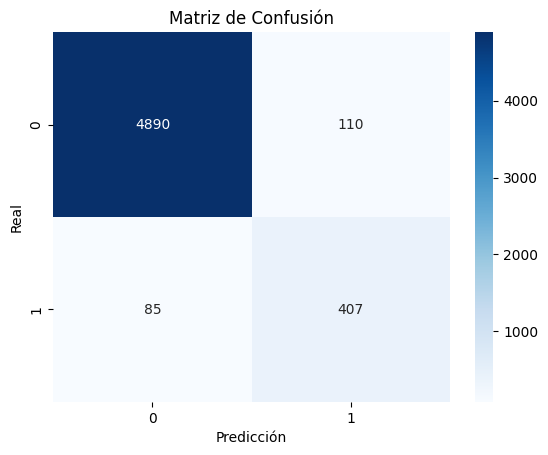

In [27]:
y_pred = [1 if label == -1 else 0 for label in labels]

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [28]:
print("\nReporte de Clasificación:")
print(classification_report(y_true, y_pred, target_names=['Normal (0)', 'Fraude (1)']))


Reporte de Clasificación:
              precision    recall  f1-score   support

  Normal (0)       0.98      0.98      0.98      5000
  Fraude (1)       0.79      0.83      0.81       492

    accuracy                           0.96      5492
   macro avg       0.89      0.90      0.89      5492
weighted avg       0.97      0.96      0.96      5492



In [29]:
from sklearn.manifold import TSNE

In [30]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

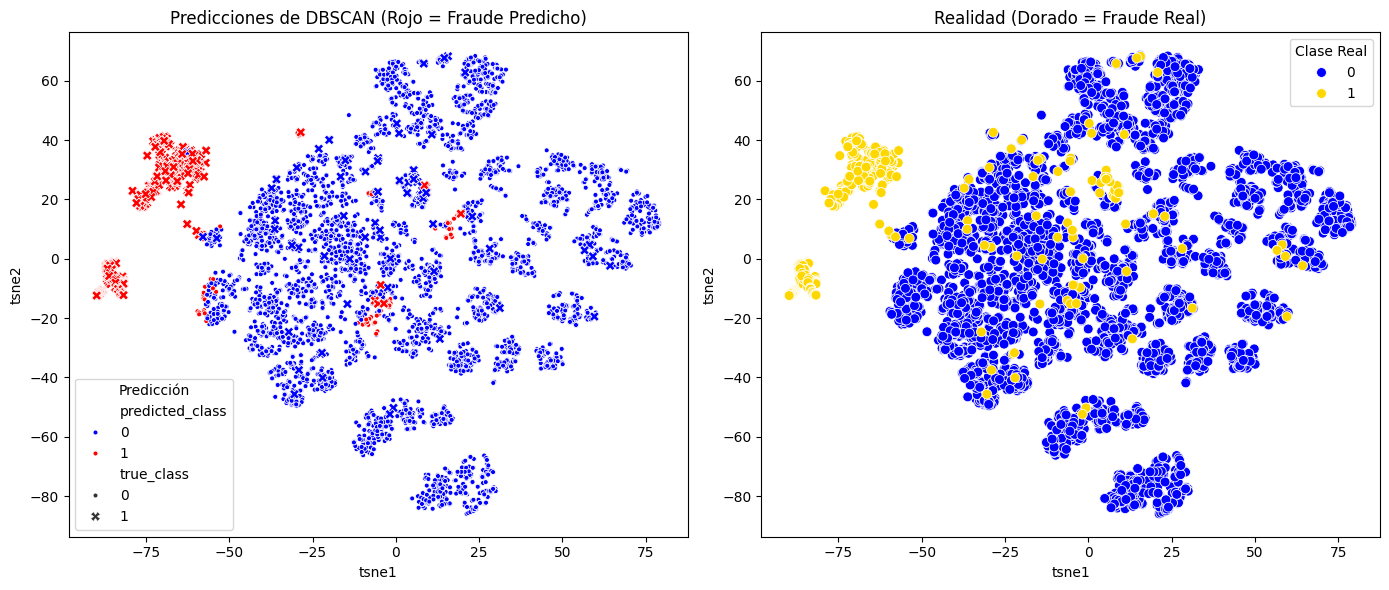

In [31]:
df_plot = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_plot['predicted_class'] = y_pred
df_plot['true_class'] = y_true.values

plt.figure(figsize=(14, 6))

# Gráfico 1: Puntos coloreados por la predicción de DBSCAN
plt.subplot(1, 2, 1)
sns.scatterplot(x='tsne1', y='tsne2', hue='predicted_class',
                palette={0: 'blue', 1: 'red'}, data=df_plot,
                style='true_class', markers={0: '.', 1: 'X'}, s=50)
plt.title('Predicciones de DBSCAN (Rojo = Fraude Predicho)')
plt.legend(title='Predicción')

# Gráfico 2: Puntos coloreados por la clase real para comparar
plt.subplot(1, 2, 2)
sns.scatterplot(x='tsne1', y='tsne2', hue='true_class',
                palette={0: 'blue', 1: 'gold'}, data=df_plot,
                s=50)
plt.title('Realidad (Dorado = Fraude Real)')
plt.legend(title='Clase Real')

plt.tight_layout()
plt.show()

<h2 id="section1" style="color: #007ACC;">Agrupación de productos: un primer paso para construir un sistema de recomendación</h2>

El **Análisis de la Cesta de la Compra (Market Basket Analysis - MBA)** es una técnica de minería de datos que se utiliza para descubrir asociaciones entre productos. Responde a la pregunta fundamental: **"¿Qué productos se compran juntos con frecuencia?"**.

Su origen se remonta a los supermercados que analizaban los recibos de compra para optimizar la distribución de los productos en la tienda. El ejemplo clásico es la anécdota (posiblemente apócrifa) de un supermercado que descubrió que los hombres que compraban pañales los viernes por la tarde también solían comprar cerveza. Al colocar la cerveza cerca de los pañales, las ventas de ambos productos aumentaron.

El objetivo del MBA es encontrar estas relaciones, tanto las obvias como las sorprendentes, para tomar decisiones de negocio más inteligentes en áreas como:

  * **Ventas cruzadas (Cross-selling):** Recomendar productos complementarios.
  * **Diseño de la tienda (Layout):** Colocar productos relacionados cerca.
  * **Promociones y descuentos:** Crear "combos" u ofertas de productos que se compran juntos.

<h3 id="section1" style="color: #007ACC;"> Conceptos y Métricas Fundamentales (La Matemática) </h3>

El MBA se formaliza a través de la **minería de reglas de asociación**. Para entenderlo, necesitamos definir tres métricas clave.

Primero, definamos nuestros términos:

  * **Itemset (Conjunto de ítems):** Una colección de uno o más productos. Ejemplo: `{Leche, Pan, Mantequilla}`.
  * **Transacción ($T$):** Una cesta de la compra, que es un *itemset*.
  * **Base de datos de transacciones ($D$):** El conjunto de todas las transacciones.
  * **Regla de Asociación:** Una expresión de la forma $X \\rightarrow Y$, donde $X$ e $Y$ son *itemsets* disjuntos. La regla se lee como "Si se compra $X$, entonces también se compra $Y$". Ejemplo: `{Pañales} \rightarrow \{Cerveza\}`.

<h4 id="section1" style="color: #007ACC;"> Métrica 1: Soporte (Support) </h4>

El soporte mide la popularidad de un *itemset*. Es la proporción de transacciones en la base de datos que contienen ese *itemset*.

  * **Fórmula:**
    $$Support(X) = \frac{\text{Número de transacciones que contienen } X}{\text{Número total de transacciones}} = \frac{|\{T \in D \mid X \subseteq T\}|}{|D|}$$
  * **Ejemplo:** Si de 1000 transacciones, 80 contienen `{Leche, Pan}`, entonces el soporte de este *itemset* es $80/1000 = 0.08$ o 8%.
  * **Importancia:** Se utiliza para filtrar los *itemsets* que no son interesantes por ser demasiado raros. Solo se consideran los *itemsets* "frecuentes" que superan un umbral de soporte mínimo.

<h4 id="section1" style="color: #007ACC;"> Métrica 2: Confianza (Confidence) </h4>

La confianza mide la fiabilidad de una regla. Es la probabilidad de que se compre $Y$ dado que ya se ha comprado $X$.

  * **Fórmula:**
    $$Confidence(X \rightarrow Y) = \frac{Support(X \cup Y)}{Support(X)}$$
  * **Ejemplo:** Si el soporte de `{Pañales, Cerveza}` es del 6% y el soporte de `{Pañales}` es del 10%, la confianza de la regla `{Pañales} \rightarrow \{Cerveza\}` es $0.06 / 0.10 = 0.6$ o 60%. Esto significa que el 60% de las veces que alguien compra pañales, también compra cerveza.
  * **Importancia:** Mide la fuerza predictiva de la regla.

<h4 id="section1" style="color: #007ACC;"> Métrica 3: Elevación (Lift) </h4>

La confianza puede ser engañosa. Si un producto es muy popular (como la leche), aparecerá en muchas reglas con alta confianza. El *lift* corrige esto midiendo cuánto más probable es comprar $Y$ cuando se compra $X$, en comparación con la probabilidad normal de comprar $Y$.

  * **Fórmula:**
    $$Lift(X \rightarrow Y) = \frac{Support(X \cup Y)}{Support(X) \times Support(Y)} = \frac{Confidence(X \rightarrow Y)}{Support(Y)}$$
  * **Interpretación:**
      * **Lift = 1:** No hay relación. La compra de $X$ no influye en la compra de $Y$.
      * **Lift \> 1:** Relación positiva. La compra de $X$ aumenta la probabilidad de comprar $Y$. Cuanto mayor sea el valor, más fuerte es la asociación.
      * **Lift \< 1:** Relación negativa. La compra de $X$ disminuye la probabilidad de comprar $Y$.
  * **Importancia:** Es la métrica más importante para determinar si una regla es realmente interesante desde el punto de vista del marketing.

<h4 id="section1" style="color: #007ACC;"> 3. El Algoritmo Apriori </h4>

El desafío del MBA es encontrar todas las reglas interesantes sin tener que calcular las métricas para cada combinación posible de productos, lo cual sería computacionalmente inviable. El **algoritmo Apriori** es la solución clásica para esto.

Se basa en un principio fundamental:

> **Principio Apriori:** Si un *itemset* es frecuente, entonces todos sus subconjuntos también deben ser frecuentes.

Esto permite al algoritmo "podar" inteligentemente las combinaciones a explorar.

  * **Paso 1: Encontrar Itemsets Frecuentes:**

    1.  Comienza con los ítems individuales (tamaño 1). Calcula su soporte y descarta los que no superen el `min_support`.
    2.  Usa los *itemsets* frecuentes de tamaño 1 para generar candidatos de tamaño 2.
    3.  Calcula el soporte de los candidatos de tamaño 2 y descarta los infrecuentes.
    4.  Repite este proceso, generando candidatos de tamaño $k$ a partir de los *itemsets* frecuentes de tamaño $k-1$, hasta que no se puedan generar más *itemsets* frecuentes.

  * **Paso 2: Generar Reglas:**
    Una vez que se tienen todos los *itemsets* frecuentes, el algoritmo genera reglas a partir de ellos (ej. del *itemset* `{A, B, C}` se pueden generar reglas como  ${A, B} \rightarrow \{C\}$).

Para implementar esto, usaremos la librería `mlxtend`, que contiene una implementación eficiente de Apriori.

In [32]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings

warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('../Datos/bread basket.csv')

In [34]:
df

Transaction           Item         date_time period_day weekday_weekend
0                1          Bread  30-10-2016 09:58    morning         weekend
1                2   Scandinavian  30-10-2016 10:05    morning         weekend
2                2   Scandinavian  30-10-2016 10:05    morning         weekend
3                3  Hot chocolate  30-10-2016 10:07    morning         weekend
4                3            Jam  30-10-2016 10:07    morning         weekend
...            ...            ...               ...        ...             ...
20502         9682         Coffee  09-04-2017 14:32  afternoon         weekend
20503         9682            Tea  09-04-2017 14:32  afternoon         weekend
20504         9683         Coffee  09-04-2017 14:57  afternoon         weekend
20505         9683         Pastry  09-04-2017 14:57  afternoon         weekend
20506         9684      Smoothies  09-04-2017 15:04  afternoon         weekend

[20507 rows x 5 columns]

In [35]:
df.dropna(inplace=True) # Eliminar filas con valores nulos
df = df[df['Item'] != 'NONE'] # Eliminar transacciones vacías
df['Item'] = df['Item'].str.strip() # Quitar espacios en blanco extra

In [36]:
baskets = df.groupby('Transaction')['Item'].apply(list).reset_index(name='Items')['Items'].tolist()

print("Ejemplo de las primeras 5 cestas de la compra:")
print(baskets[:5])

Ejemplo de las primeras 5 cestas de la compra:
[['Bread'], ['Scandinavian', 'Scandinavian'], ['Hot chocolate', 'Jam', 'Cookies'], ['Muffin'], ['Coffee', 'Pastry', 'Bread']]


In [37]:
te = TransactionEncoder()
te_ary = te.fit(baskets).transform(baskets)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print("Dimensiones de la matriz one-hot encoded:", df_encoded.shape)

Dimensiones de la matriz one-hot encoded: (9465, 94)


In [38]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

print("Número de itemsets frecuentes encontrados:", len(frequent_itemsets))
print("Muestra de itemsets frecuentes:")
print(frequent_itemsets.sort_values(by='support', ascending=False).head())

Número de itemsets frecuentes encontrados: 61
Muestra de itemsets frecuentes:
     support         itemsets
6   0.478394         (Coffee)
2   0.327205          (Bread)
26  0.142631            (Tea)
4   0.103856           (Cake)
34  0.090016  (Bread, Coffee)


In [39]:
print("\n--- Generando reglas de asociación ---")
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Ordenar las reglas por confianza y lift para ver las más fuertes primero
strong_rules = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

print("Número de reglas de asociación encontradas:", len(strong_rules))
print("\n--- Reglas de Asociación Más Fuertes Encontradas ---")
print(strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


--- Generando reglas de asociación ---
Número de reglas de asociación encontradas: 42

--- Reglas de Asociación Más Fuertes Encontradas ---
         antecedents consequents   support  confidence      lift
30           (Toast)    (Coffee)  0.023666    0.704403  1.472431
28  (Spanish Brunch)    (Coffee)  0.010882    0.598837  1.251766
18       (Medialuna)    (Coffee)  0.035182    0.569231  1.189878
22          (Pastry)    (Coffee)  0.047544    0.552147  1.154168
0        (Alfajores)    (Coffee)  0.019651    0.540698  1.130235
16           (Juice)    (Coffee)  0.020602    0.534247  1.116750
24        (Sandwich)    (Coffee)  0.038246    0.532353  1.112792
6             (Cake)    (Coffee)  0.054728    0.526958  1.101515
26           (Scone)    (Coffee)  0.018067    0.522936  1.093107
12         (Cookies)    (Coffee)  0.028209    0.518447  1.083723


<h2 id="section1" style="color: #007ACC;">Crimen en Chicago</h2>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sodapy import Socrata
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import warnings

warnings.filterwarnings('ignore')

In [41]:
# Identificador del dataset en el portal de datos de Chicago
DATASET_ID = "ijzp-q8t2"
# No se necesita un token de API para el acceso público
APP_TOKEN = None
# Portal de datos de la Ciudad de Chicago
DATA_URL = "data.cityofchicago.org"

# Conectar al cliente de la API
client = Socrata(DATA_URL, APP_TOKEN)

# Obtener los 50,000 registros más recientes que tengan latitud y longitud
# Usamos una consulta simple para filtrar los valores nulos
results = client.get(DATASET_ID, limit=50000, where="latitude IS NOT NULL")

# Convertir los resultados a un DataFrame de pandas
df_crime = pd.DataFrame.from_records(results)

In [42]:
# Convertir las columnas de coordenadas a tipo numérico
df_crime['latitude'] = pd.to_numeric(df_crime['latitude'])
df_crime['longitude'] = pd.to_numeric(df_crime['longitude'])

In [43]:
df_crime[['case_number', 'date', 'primary_type', 'latitude', 'longitude']].head()

case_number                     date     primary_type   latitude  longitude
0    JD327000  2020-08-10T09:45:00.000          ROBBERY  41.908418 -87.677407
1    JG415333  2023-09-06T17:00:00.000  CRIMINAL DAMAGE  41.886018 -87.633938
2    JG416325  2023-09-06T11:00:00.000            THEFT  41.871835 -87.626151
3    JC272771  2019-05-21T08:20:00.000         BURGLARY  41.856547 -87.695605
4    JE295655  2021-07-07T10:30:00.000      SEX OFFENSE  41.655116 -87.594883

In [44]:
geo_df = df_crime[['latitude', 'longitude']].copy()
geo_df['latitude'] = pd.to_numeric(geo_df['latitude'])
geo_df['longitude'] = pd.to_numeric(geo_df['longitude'])
geo_df.dropna(inplace=True)

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(geo_df)

In [46]:
# Supongamos que queremos definir 6 zonas de patrullaje.
k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [47]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print(f"\nUbicaciones óptimas para {k} centros de patrullaje (Centroides):")
print(pd.DataFrame(centroids, columns=['Latitud', 'Longitud']))


Ubicaciones óptimas para 6 centros de patrullaje (Centroides):
     Latitud   Longitud
0  41.908939 -87.747037
1  36.619446 -91.686566
2  41.744229 -87.602719
3  41.873734 -87.642833
4  41.778876 -87.690022
5  41.961451 -87.675888


In [48]:
dbscan = DBSCAN(eps=0.1, min_samples=50, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [49]:
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f"\nDBSCAN encontró {n_clusters_dbscan} hotspots y {n_noise} incidentes aislados.")


DBSCAN encontró 3 hotspots y 66 incidentes aislados.


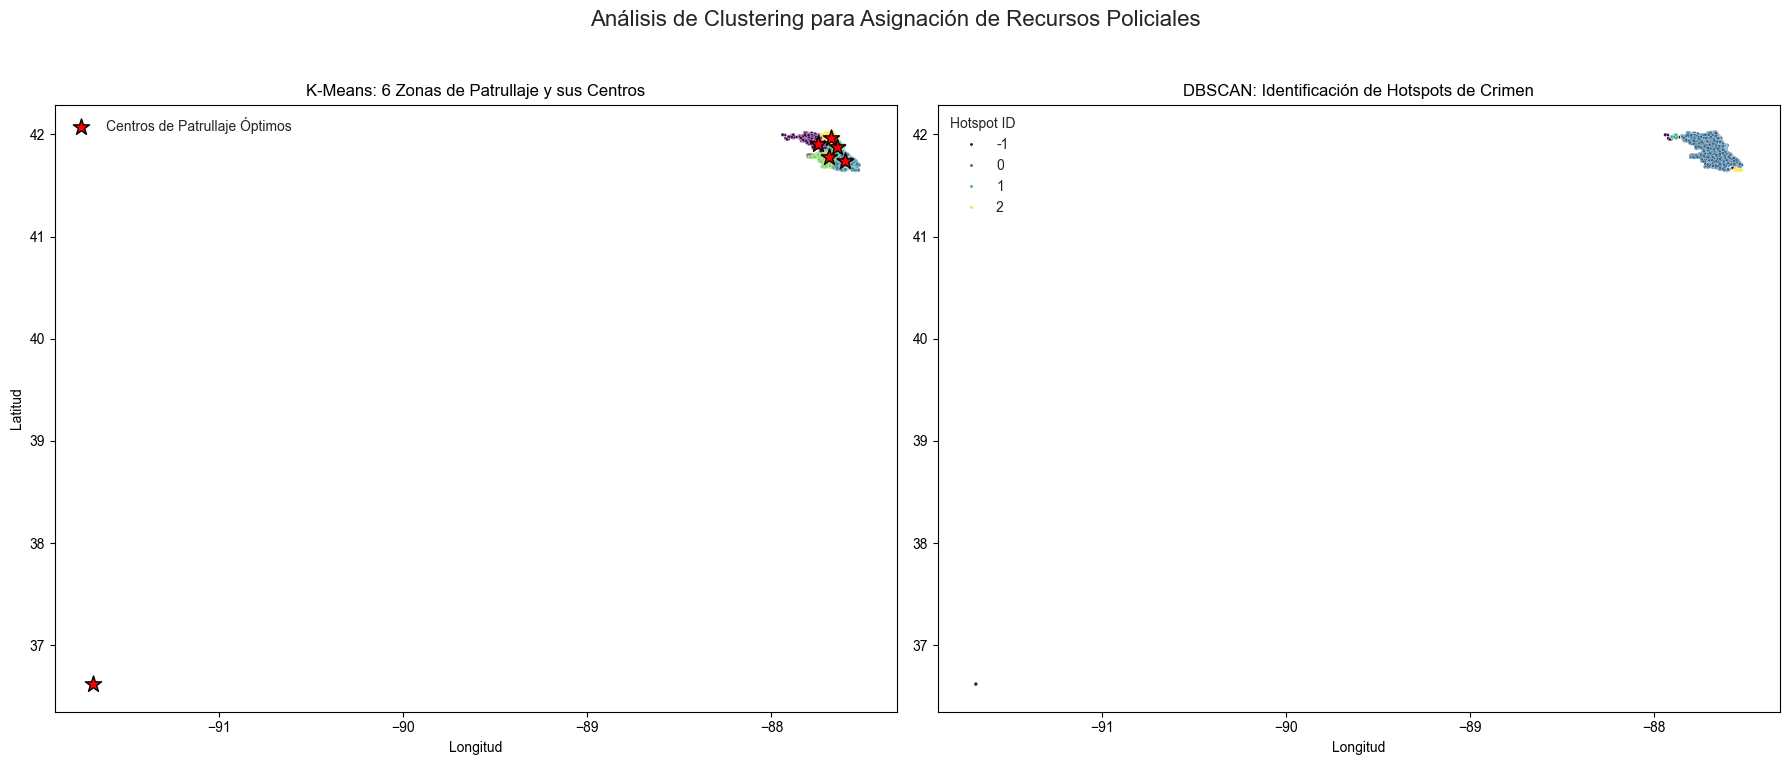

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
plt.style.use('seaborn-v0_8-darkgrid')

# Gráfico 1: K-Means - Zonas de Servicio
sns.scatterplot(x=geo_df['longitude'], y=geo_df['latitude'], hue=kmeans_labels,
                palette='viridis', s=5, ax=ax1, legend=None)
ax1.scatter(centroids[:, 1], centroids[:, 0], c='red', s=150, marker='*',
            edgecolors='k', label='Centros de Patrullaje Óptimos')
ax1.set_title(f'K-Means: {k} Zonas de Patrullaje y sus Centros')
ax1.set_xlabel('Longitud')
ax1.set_ylabel('Latitud')
ax1.legend()

# Gráfico 2: DBSCAN - Hotspots de Crimen
sns.scatterplot(x=geo_df['longitude'], y=geo_df['latitude'], hue=dbscan_labels,
                palette='viridis', s=5, ax=ax2)
ax2.set_title('DBSCAN: Identificación de Hotspots de Crimen')
ax2.set_xlabel('Longitud')
ax2.set_ylabel('') # Evitar redundancia
ax2.legend(title='Hotspot ID')


plt.suptitle('Análisis de Clustering para Asignación de Recursos Policiales', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [51]:
import folium

In [52]:
sample_size = 5000
sample_indices = np.random.choice(geo_df.index, size=sample_size, replace=False)

geo_sample = geo_df.loc[sample_indices]
kmeans_labels_sample = kmeans_labels[sample_indices]
dbscan_labels_sample = dbscan_labels[sample_indices]


In [53]:
chicago_center = [geo_df['latitude'].mean(), geo_df['longitude'].mean()]
map_kmeans = folium.Map(location=chicago_center, zoom_start=11, tiles="CartoDB positron")

# Añadir los puntos de crimen coloreados por clúster
colors_kmeans = ['blue', 'orange', 'green', 'purple', 'cyan', 'yellow']
for idx, row in geo_sample.iterrows():
    cluster_id = kmeans_labels[idx]
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color=colors_kmeans[cluster_id],
        fill=True,
        fill_opacity=0.6
    ).add_to(map_kmeans)

# Añadir los centroides como marcadores especiales
for i, centroid in enumerate(centroids):
    folium.Marker(
        location=[centroid[0], centroid[1]],
        popup=f'Centro Óptimo del Clúster {i}',
        icon=folium.Icon(color='red', icon='star')
    ).add_to(map_kmeans)

In [55]:
map_kmeans

In [54]:
map_dbscan = folium.Map(location=chicago_center, zoom_start=11, tiles="CartoDB positron")

# Paleta de colores para los hotspots (excluyendo el gris para el ruido)
unique_dbscan_labels = set(dbscan_labels_sample)
colors_dbscan = plt.cm.get_cmap('viridis', len(unique_dbscan_labels))
color_dict = {label: f'#{int(c[0]*255):02x}{int(c[1]*255):02x}{int(c[2]*255):02x}' for label, c in zip(unique_dbscan_labels, colors_dbscan.colors)}

for idx, row in geo_sample.iterrows():
    cluster_id = dbscan_labels[idx]
    
    # Asignar gris al ruido, y colores a los hotspots
    point_color = 'gray' if cluster_id == -1 else color_dict[cluster_id]
    
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color=point_color,
        fill=True,
        fill_opacity=0.7 if cluster_id != -1 else 0.3 # Hacer el ruido más transparente
    ).add_to(map_dbscan)

In [56]:
map_dbscan

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

In [58]:
heart_disease = fetch_ucirepo(id=45)
df = heart_disease.data.features
df['target'] = heart_disease.data.targets # La variable objetivo (0=sano, >0=enfermo)

# Para simplificar, convertimos el target a binario (0=sano, 1=enfermo)
df['target'] = (df['target'] > 0).astype(int)

# Limpieza: Eliminar filas con valores nulos (este dataset tiene algunos)
df.dropna(inplace=True)

In [59]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       1  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0

In [60]:
# Seleccionar las características numéricas para el clustering
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X = df[numerical_features]
y_true = df['target'] # Guardamos el target real para una evaluación posterior


In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Dataset listo. {X.shape[0]} pacientes y {X.shape[1]} métricas a analizar.")

Dataset listo. 297 pacientes y 5 métricas a analizar.


In [62]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Los 2 componentes principales capturan el {explained_variance:.2%} de la varianza.")

Los 2 componentes principales capturan el 57.88% de la varianza.


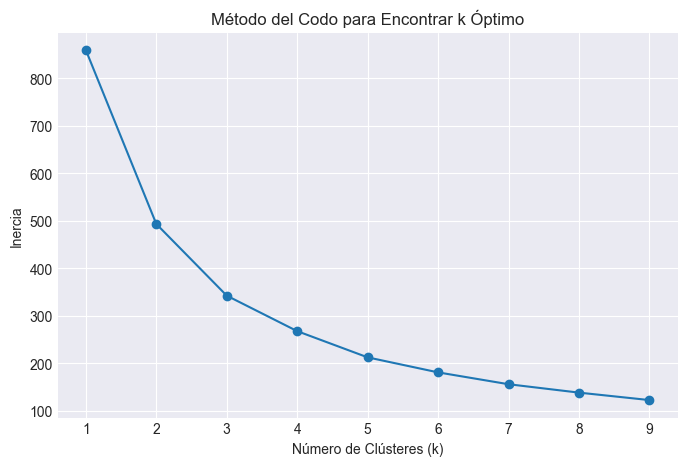

In [63]:
inertia = {}
for k_val in range(1, 10):
    kmeans_model = KMeans(n_clusters=k_val, random_state=42, n_init=10).fit(X_pca)
    inertia[k_val] = kmeans_model.inertia_

plt.figure(figsize=(8, 5))
plt.plot(list(inertia.keys()), list(inertia.values()), 'o-')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Encontrar k Óptimo')
plt.grid(True)
plt.show()

In [64]:
# El codo sugiere k=3 o k=4. Usaremos k=3 para perfiles de riesgo "bajo, medio, alto".
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

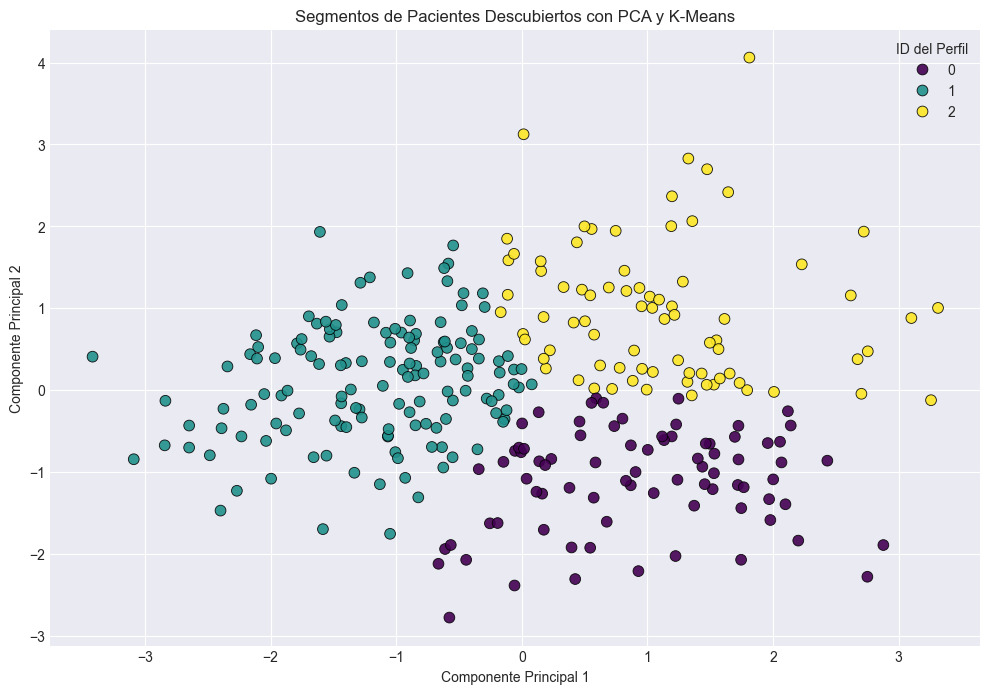

In [65]:
df_plot = pd.DataFrame(X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
df_plot['Cluster'] = cluster_labels

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='Cluster',
                data=df_plot, palette='viridis', s=60, alpha=0.9, edgecolor='k')
plt.title('Segmentos de Pacientes Descubiertos con PCA y K-Means')
plt.legend(title='ID del Perfil')
plt.grid(True)
plt.show()

In [66]:
df['Cluster'] = cluster_labels
# Calcular la media de las métricas para cada clúster
profile_summary = df.groupby('Cluster')[numerical_features + ['target']].mean().round(2)

print("Características Promedio de Cada Perfil de Paciente:")
print(profile_summary)

Características Promedio de Cada Perfil de Paciente:
           age  trestbps    chol  thalach  oldpeak  target
Cluster                                                   
0        58.62    127.60  222.31   126.10     1.92    0.74
1        48.59    124.99  236.27   164.36     0.43    0.22
2        60.96    147.85  292.78   147.40     1.29    0.60
